In [5]:
import sklearn
import tensorflow

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
length = bream_length+smelt_length # +연산자 오버로딩 리스트일 경우엔 합쳐지는 역할 정수일 때는 그냥 덧셈
weight = bream_weight+smelt_weight

#import matplotlib.pyplot as plt #파이썬에 그래프를 그리는 대표적인 라이브러리 matplotlib.pyplot as '약어' 약어는 plt로 사용 라이브러리를 import
#산점도 scatter plot 아래 그래프

#plt.scatter(bream_length, bream_weight) #위에 plt로 지정했으므로 plt.으로 시작 scatter 함수 괄호안에 첫번째 매개변수에는 x축의 데이터 두번째 매개변수에는 y축 데이터 입력 
#plt.scatter(smelt_length, smelt_weight) #스캐터 함수를 두번 연속 호출하면 두개의 산점도가 그려지는 게 아니라 하나의 산점도에 두개의 데이터를 같이 중첩해서 그릴 수 있다 
#plt.xlabel('length')
#plt.ylabel('weight')
#plt.show() #설정한 그래프를 설정하려면 메소드(plt)호출 하면 됨 

#리스트내포
fish_data = [[l,w]for l, w in zip(length, weight)] 
#리스트 안에 for문이 들어있음 
#1.앞에서 만든 length와 weight를 zip함수로 묶고 length 리스트에서 요소 하나를 꺼내서 l에다 넣고 weight에 요소 하나 꺼내서 w에 넣는걸 반복(for문) length와 weight의 리스트가 끝날 때 까지
#2.앞에 있는 [l,w]로 된 작은 리스트를 만들어서 큰 외각 리스트에 추가하게 됨 결과 ex) [ [25.4, 242.0], [26.3, 290.0] ] ~

#정답준비
fish_target = [1]*35 + [0]*14 #1이 들어있는 리스트 35개 만들고 0이 들어있는 리스트 14개 만들고 둘이 합치면 [1,1,1,1,1,0,0,0] 같은 값이 나오는 fish_target이라는 하나의 리스트를 만듬
#정답을 0또는 1로 두는 것을 이진분류 도미를 찾는 문제면 정답을 도미 데이터를 1 빙어 데이터를 0으로 하면 된다

#k-최근접이웃
from sklearn.neighbors import KNeighborsClassifier #사이킥런.neighbors라는 모듈 밑에 KNeighborsClassifier 클래스로 구현되어 있다. from import로 클래스를 import
kn = KNeighborsClassifier() #클래스를 사용할 땐 클래스 이름뒤에 ()를 붙여서 인스턴스(객체)를 만듬 클래스의 이름은 kn
kn.fit(fish_data, fish_target)#앞에서 만든 데이터를 fit 메소드에 전달 fit은 두 데이터를 가지고 머신러닝 요소를 훈련 앞에 kn은 머신러닝 모델이라 부름
kn.score(fish_data, fish_target)#스코어 메소드를 호출해서 얼마나 훈련이 잘 됐는지 확인 다 맞추면 1.0 값이 출력 반 맞추면 50퍼인 0.5 정도 출력
kn.predict([[30, 600]])#길이가 30이고 weight가 600인 생선  
#프리딕트 메소드로 예측 fit 메소드를 2차원 리스트로 주었기 때문에 마찬가지로 predict메소드 에도 2차원 리스트로 넣어준다 
#구동 해보면 결과값이 array([1])로 나오는데 여기서 1은 도미 데이터 이므로 맞음 

#무조건 도미
kn49 = KNeighborsClassifier(n_neighbors=49) # 클래스의 매개변수 n_neighbors 전체 샘플 생선데이터의 개수가 49개여서 49를 씀 

kn49.fit(fish_data, fish_target) #피시 데이타를 가지고 정답 데이타인 피시 타겟을 얼마만큼 잘 맞추느냐 
kn49.score(fish_data, fish_target) #0.7142857142857143 라는 값이 나오는데 전체 샘플 49개중에 도미가 대부분(35개) 이므로 35/49 이므로 0.71

train_input = fish_data[:35] #슬라이싱 연산 피시데이터를 트레인인풋에 집어넣음 
train_target = fish_target[:35] #훈련 세트 
#train input과 train target은 훈련할 때 사용

test_input = fish_data[35:] #총 49개이므로 35:0 하면 14개
test_target = fish_target[35:] #테스트 세트
#test input과 test target은 평가할 때 사용


from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn = kn.fit(train_input, train_target) #fit으로 훈련 훈련할 땐 train을 넣기로 했으므로 train 인풋 타겟을 넣음 

kn.score(test_input, test_target) #score로 테스트 테스트 할 땐 test를 사용하기로 했으므로 test 인풋 타겟을 넣음
#결과값이 0.0 정확도가 0퍼센트 테스트 인풋의 샘플 14개를 모두 못맞춤 

#넘파이 사용하기
import numpy as np #numpy를 as 키워드로 np 라고 줄여서 씀 
input_arr = np.array(fish_data) #fish_data를 np.array함수에 넣어서 호출 input ar이 넘파이 객체가 됨 
target_arr = np.array(fish_target)

#print(input_arr) # 출력하면 49개의 행(샘플)이 있고 2개의 열(특성)이 있는 넘파이 배열이 나옴 


#데이터 섞기

index = np.arange(49) #arange 함수 0~48까지 1씩 증가하는 정수배열을 만듬 index에 저장   
np.random.shuffle(index) #index를 랜덤하게 섞는 셔플 함수 

train_input = input_arr[index[:35]] #배열 슬라이싱 index의 0~34번째 값이 포함된 input_arr을 train_input에 넣음 
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

#데이터 나누고 확인하기



#두번째 머신러닝 프로그램
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target) #1.0 100% 

#넘파이로 데이터 준비
fish_data = np.column_stack((length, weight)) #column_stack 주어진 두 배열을 나란히 세운다음 열로 붙여줌 fish_length가 첫번째 열 웨잇이 두번째 열에 들어감 
#[] 1 1 1 ][] 0 0 0] 을 컬럼스택 하면 세로로 1 1 1 0 0 0이 됨 concatenate는 두 배열을 길게 붙여줌 111000
#np.full((2,3), 9) 9가 가로 두줄 세로 세줄인 배열을 만듬 
fish_target = np.concatenate((np.ones(35), np.zeros(14))) #1이 35개 채워진 1차원 배열 0이 14개 채워진 1차원 배열을 만듬 

#사이킷런으로 데이터 나누기
from sklearn.model_selection import train_test_split #사이킷런에 모델 셀렉션 모듈 밑에 트레인 테스트 스플릿 제공을 하고 있다 

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42) # 분류문제를 작업할 경우엔 일반적으로 stratify를 사용하는 게 좋다 랜덤 스테이트는 실전에는 필요없고 튜토리얼에서 결과를 재현하기 위해 사용 중요한 의미는 없음
# fish_data fish_target을 train_test_split 함수에 넣으면 두개로 나뉘어짐 fish_data는 train_input과 test_input으로 fish_target은 train_target과 test_target 전달되는 배열을 각각 두개씩 쪼개서 전달 
# 인덱스 배열을 만들고 섞고 할 필요 없이 train_test_split 함수를 사용하면 넘파이 배열을 전달해서 나눠진 넘파이 배열 4개를 손쉽게 받을 수 있다 


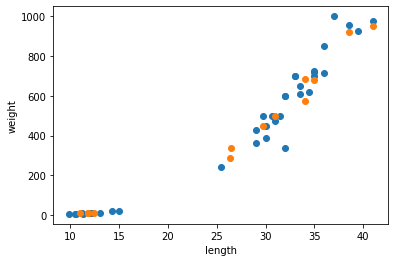

In [6]:
#데이터 나누고 확인하기
import matplotlib.pyplot as plt 
plt.scatter(train_input[:, 0], train_input[:, 1]) # [:] 왼쪽이 행 오른쪽이 열 첫번째 train input은 행은 전체 열은 첫번째 특성인(length)로 x데이터에 넣고 두번째 train_input은 행은 전체 열은 두번째 특성인 weight를 y데이터에 집어넣는다 
plt.scatter(test_input[:, 0], test_input[:, 1]) # 49개의 행과 2개의 열(특성 length weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[0.]


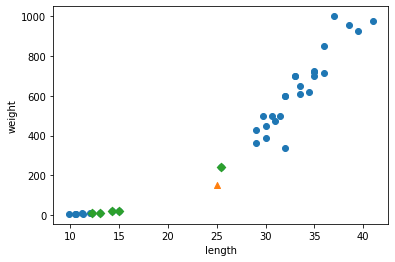

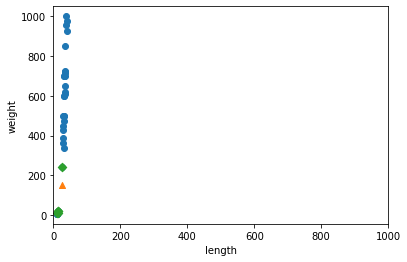

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


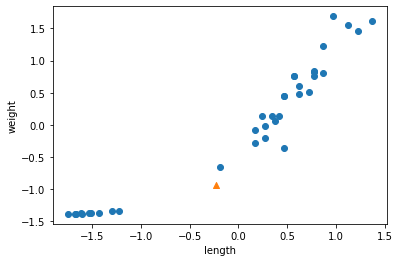

[1.]


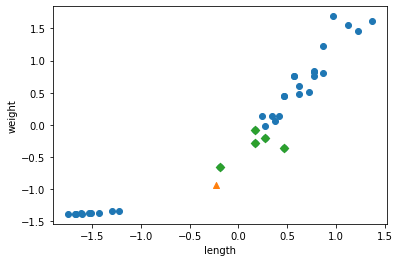

In [11]:
#수상한 도미
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target) #입력(input)과 정답(target)을 훈련(fit)
kn.score(test_input, test_target) #테스트 인풋과 테스트 타겟을 넣어서 스코어 메소드로 정확도 출력 1.0 100% 

print(kn.predict([[25, 150]])) # 25센치와 150g인 물고기가 뭔지 predict로 예측해봤더니 0이 나왔고 0은 빙어  

distances, indexes = kn.kneighbors([[25, 150]]) #이웃의 샘플 인덱스를 뽑는 메소드 kn.kneighbors 이 메소드에 25센치150그람을 넣으면 가장가까운 5개의 샘플까지 distance(거리)랑 indexes를 5개 반환 

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # 트레인 인풋 에 0은 길이특성 1은 웨이트 특성 수상한 도미(25,150)랑 가장가까운 5개의 샘플을 마름모(D)로 표시  
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#기준을 맞춰라
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000)) #xlim 함수 축의 스케일을 조정할 수 있는 메소드 지금 x축은 40 y축은 1000이므로 x축을 y축과 똑같이 하기 위해서 0,1000으로 지정 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#표준 점수로 바꾸기 z 정수        특성 - 평균 / 표준편차
mean = np.mean(train_input, axis=0) #mean 함수 평균을 구하는 함수 변환하고자 하는 배열 train_input을 집어넣고 axis 축을 0으로 설정 0으로 설정하면 행을 따라 쭉 계산해서 두개의 평균을 계산 axis를 1로하면 각행을 따로따로 평균을 샘플마다 구함
std = np.std(train_input, axis=0) #std 함수 표준편차를 구하는 함수 axis 0 특성마다 평균을 구함 axis 1 샘플마다 평균을 구함 
#axis 3차원 배열이면 0,1,2 세개의 축을 지정 2차원 배열이면 0,1 지정 axis 0번째 축 행방향 1번째 축 열방향

print(mean, std)

train_scaled = (train_input - mean) / std #넘파이 브로드캐스팅

#수상한 도미 다시 표시하기

new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#전처리 데이터에서 모델 훈련 입력데이터를 머신러닝 모델이 사용할 수 있도록 적절히 가공하는 것 전처리 한다 
kn.fit(train_scaled, train_target) #표준점수,정답데이터를 fit으로 훈련 

test_scaled = (test_input - mean) / std #입력데이터(input) 변환 입력데이터도 표준점수로 바꿔서 사용해야 함 
kn.score(test_scaled, test_target) # 1.0 표준점수와 정답데이터를 넣고 테스트 적중률 100퍼

print(kn.predict([new])) #new(수상한도미) 데이터를 무슨 생선인지 predict 예측 하면 1이 나옴 도미 0 빙어 

distances, indexes = kn.kneighbors([new]) # kn.kneighbors 함수 new 데아터와 가장가까운 5개의 샘플을 뽑아서 distance 거리와 indexes를 추출해줌 디버깅 목적 

plt.scatter(train_scaled[:,0], train_scaled[:,1]) #첫번째 train_scaled [:] 왼쪽은 전체 열 오른쪽은 1번째 특성인 length 두번째 train_scaled [:] 왼쪽은 전체열 오른쪽은 2번째 특성인 weight
plt.scatter(new[0], new[1], marker='^') #new[0]수상한 도미의 길이 x new[1]수상한 도미의 무게 y
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D') #indexes,첫번째 특성 length indexes.두번째 특성 weight를 넣음 
#indexes는 kn 객체를 만들었을 때 사용한 훈련 데이터의 index train_scaled에 행에 넣어서 가장가까운 이웃을 출력할수 있다
plt.xlabel('length')
plt.ylabel('weight')
plt.show()




#3강 복습
훈련할때는 fit 메소드 테스트 할때는 score 메소드 데이터 fish_data와 정답인 fish_target
가상의 데이터가 하나 주어 졌을 때(30,600) 이게 도미인지 빙어인지 예측하려면은 predict
모든 알고리즘의 클래스에 동일하게 적용 


배열=텐서
1차원 벡터 2차원 행렬  
1차원 배열이지만 원소가 7개면 7차원 벡터

#머신러닝

k 최근접 이웃 = 지도학습 훈련데이터 입력과 정답인 타겟을 같이 제공을 해줘야함 
비지도학습 타깃을 구할 수 없거나 타깃 데이터가 없을 때 입력값만 가지고 사용
강화학습

#이진분류 구조

찾고자하는 대상 양성클래스
찾고자하는 대상이 아닌 것 음성클래스
양성:1 음성:0으로 타깃데이터를 만듬 

훈련을 한 건지 답을 몽땅 외워버린건지 구분할 수 없으므로 훈련이 잘 됐는지 확인하려면 훈련에 사용하지 않은 데이터를 사용
빙어데이터를 하나도 포함시키지않고 모델을 훈련하면 테스트 할 때 빙어를 예측하라고 하면 예측X
특정 클래스가 한 쪽에 몰려있는 것을 샘플링 편향 
이런 샘플링 편향을 없애기 위해 도미와 빙어를 골고루 섞어서 나눠줄 때 넘파이 라이브러리 사용 파이썬에서 과학적인 개발에 넘파이 개발이 사용됨
샘플을 행에 넣고 특성을 열에 넣는 2차원 배열을 훈련데이터로 많이 사용 
배열 자체를 섞으면 결과가 어긋날 수 있으므로 배열의 인덱스를 섞음 
0에서 48까지 인덱스를 배열이라고 가정하고 섞은뒤 :35만큼 훈련세트 35: 테스트세트로 나눔 이렇게 사용하면 섞인 배열을 쉽게 만들 수 있다.
  

